# PyPI qqman GWAS plots  

Example using Type 2 Diabetes 2018 ebi-a-GCST007517 GWAS data from OpenGWAS Project

https://gwas.mrcieu.ac.uk/datasets/ebi-a-GCST007517/ 


#### Imports & setup

In [1]:
import os
import pandas as pd
from qqman import qqman
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### File I/O variables

In [2]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'T2D_ebi-a-GCST007517.assoc'
plink_logistic = 'T2D_ebi-a-GCST007517.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_pypi_qqman'

#### setup variables

In [3]:
gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

<br>  

## plot PLINK --assoc output

In [4]:
!head {gwas_file_assoc}

CHR SNP BP A1 F_A F_U A2 CHISQ P OR
1 rs75333668 762320 T 0.0 0.0 C 0.0 0.9720999034595879 -0.0495
1 rs200686669 861349 T 0.0 0.0 C 0.0 0.7657993616579718 -0.0299
1 rs201186828 865545 A 0.0 0.0 G 0.0 0.7029994738849784 0.1469
1 rs41285790 865628 A 0.0 0.0 G 0.0 0.8170000817717465 0.0099
1 rs140751899 865662 A 0.0 0.0 G 0.0 0.583500187585788 -0.0434
1 rs145442390 865665 A 0.0 0.0 G 0.0 0.08638930895260652 -0.4266
1 rs9988179 865694 T 0.0 0.0 C 0.0 0.977599993475503 -0.0827
1 rs116730894 865700 T 0.0 0.0 C 0.0 0.41830013043207676 -2.9642
1 rs144317111 866429 T 0.0 0.0 C 0.0 0.5727999877343022 -0.3537


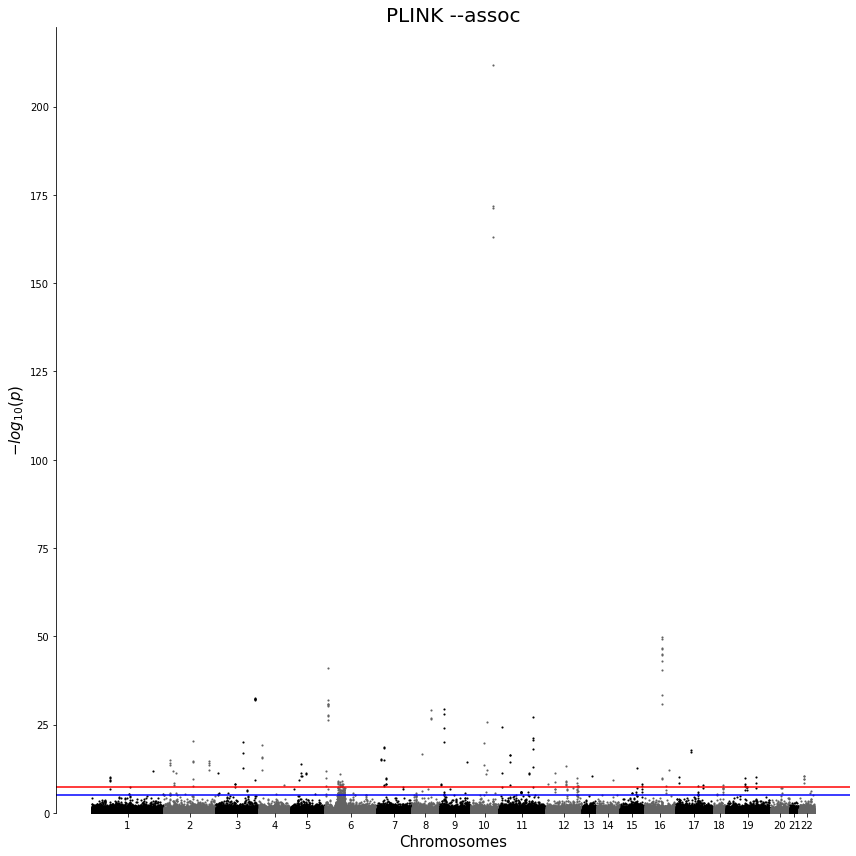

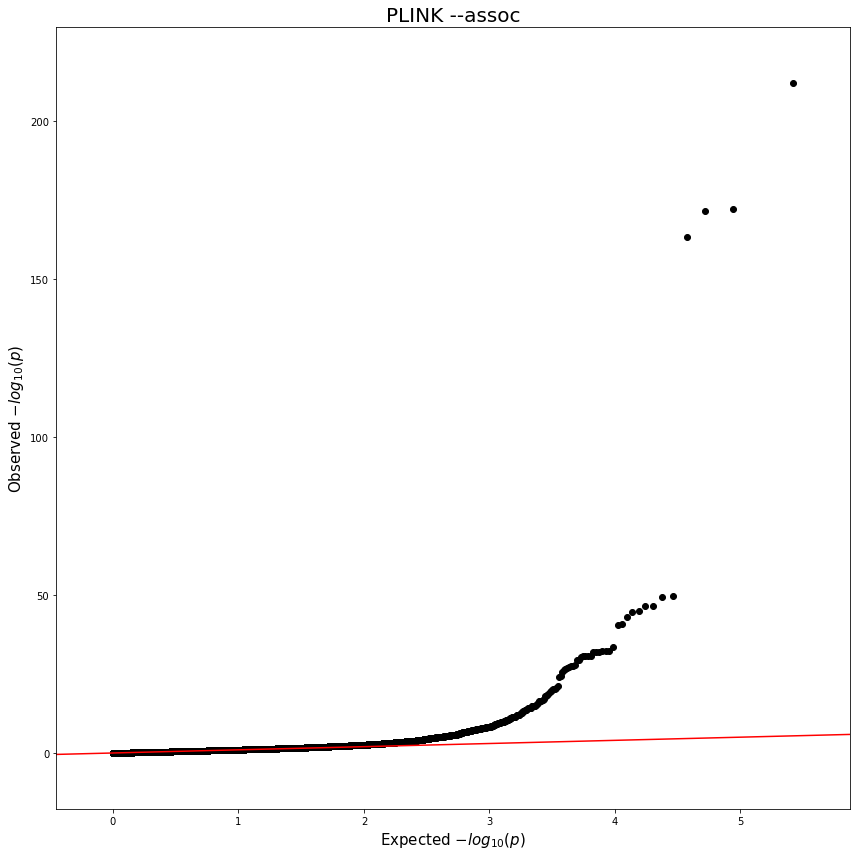

In [5]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=True, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=True, 
                title='PLINK --assoc')


#### Generate --assoc plots as subplot example

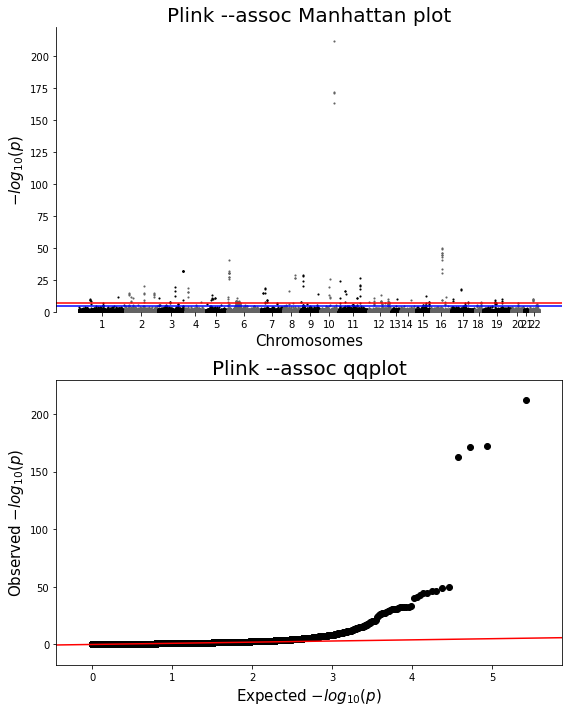

In [6]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_assoc, ax=axes[0], title="Plink --assoc Manhattan plot")
qqman.qqplot(gwas_file_assoc, ax=axes[1], title="Plink --assoc qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [7]:
## generate Manhattan plot
qqman.manhattan(gwas_file_assoc, 
                out=plot_prefix_assoc+'.Manhattan.png', 
                show=False, 
                title='PLINK --assoc')

## generate qqplot
qqman.qqplot(gwas_file_assoc, 
                out=plot_prefix_assoc+'.qqplot.png', 
                show=False, 
                title='PLINK --assoc')

<br>  

## plot PLINK --logistic output

In [8]:
!head {gwas_file_logistic}

CHR SNP BP A1 TEST NMISS OR SE STAT P
1 rs75333668 762320 T ADD 0 -0.0495 0.1728 0.0 0.9720999034595879
1 rs200686669 861349 T ADD 0 -0.0299 0.1837 0.0 0.7657993616579718
1 rs201186828 865545 A ADD 0 0.1469 0.3851 0.0 0.7029994738849784
1 rs41285790 865628 A ADD 0 0.0099 0.053 0.0 0.8170000817717465
1 rs140751899 865662 A ADD 0 -0.0434 0.1606 0.0 0.583500187585788
1 rs145442390 865665 A ADD 0 -0.4266 0.3024 0.0 0.08638930895260652
1 rs9988179 865694 T ADD 0 -0.0827 0.1611 0.0 0.977599993475503
1 rs116730894 865700 T ADD 0 -2.9642 5.6209 0.0 0.41830013043207676
1 rs144317111 866429 T ADD 0 -0.3537 0.4794 0.0 0.5727999877343022


<br>

## <font color='blue'> *_NOTE: need to extract P-values from --logistic output --> pass to qqplot function_* </font>

reason for this is due to bug in the pypi qqman package:   

* error when parsing file 'TEST' column when tries to cast 'ADD' string to float  
* see error message below for details  



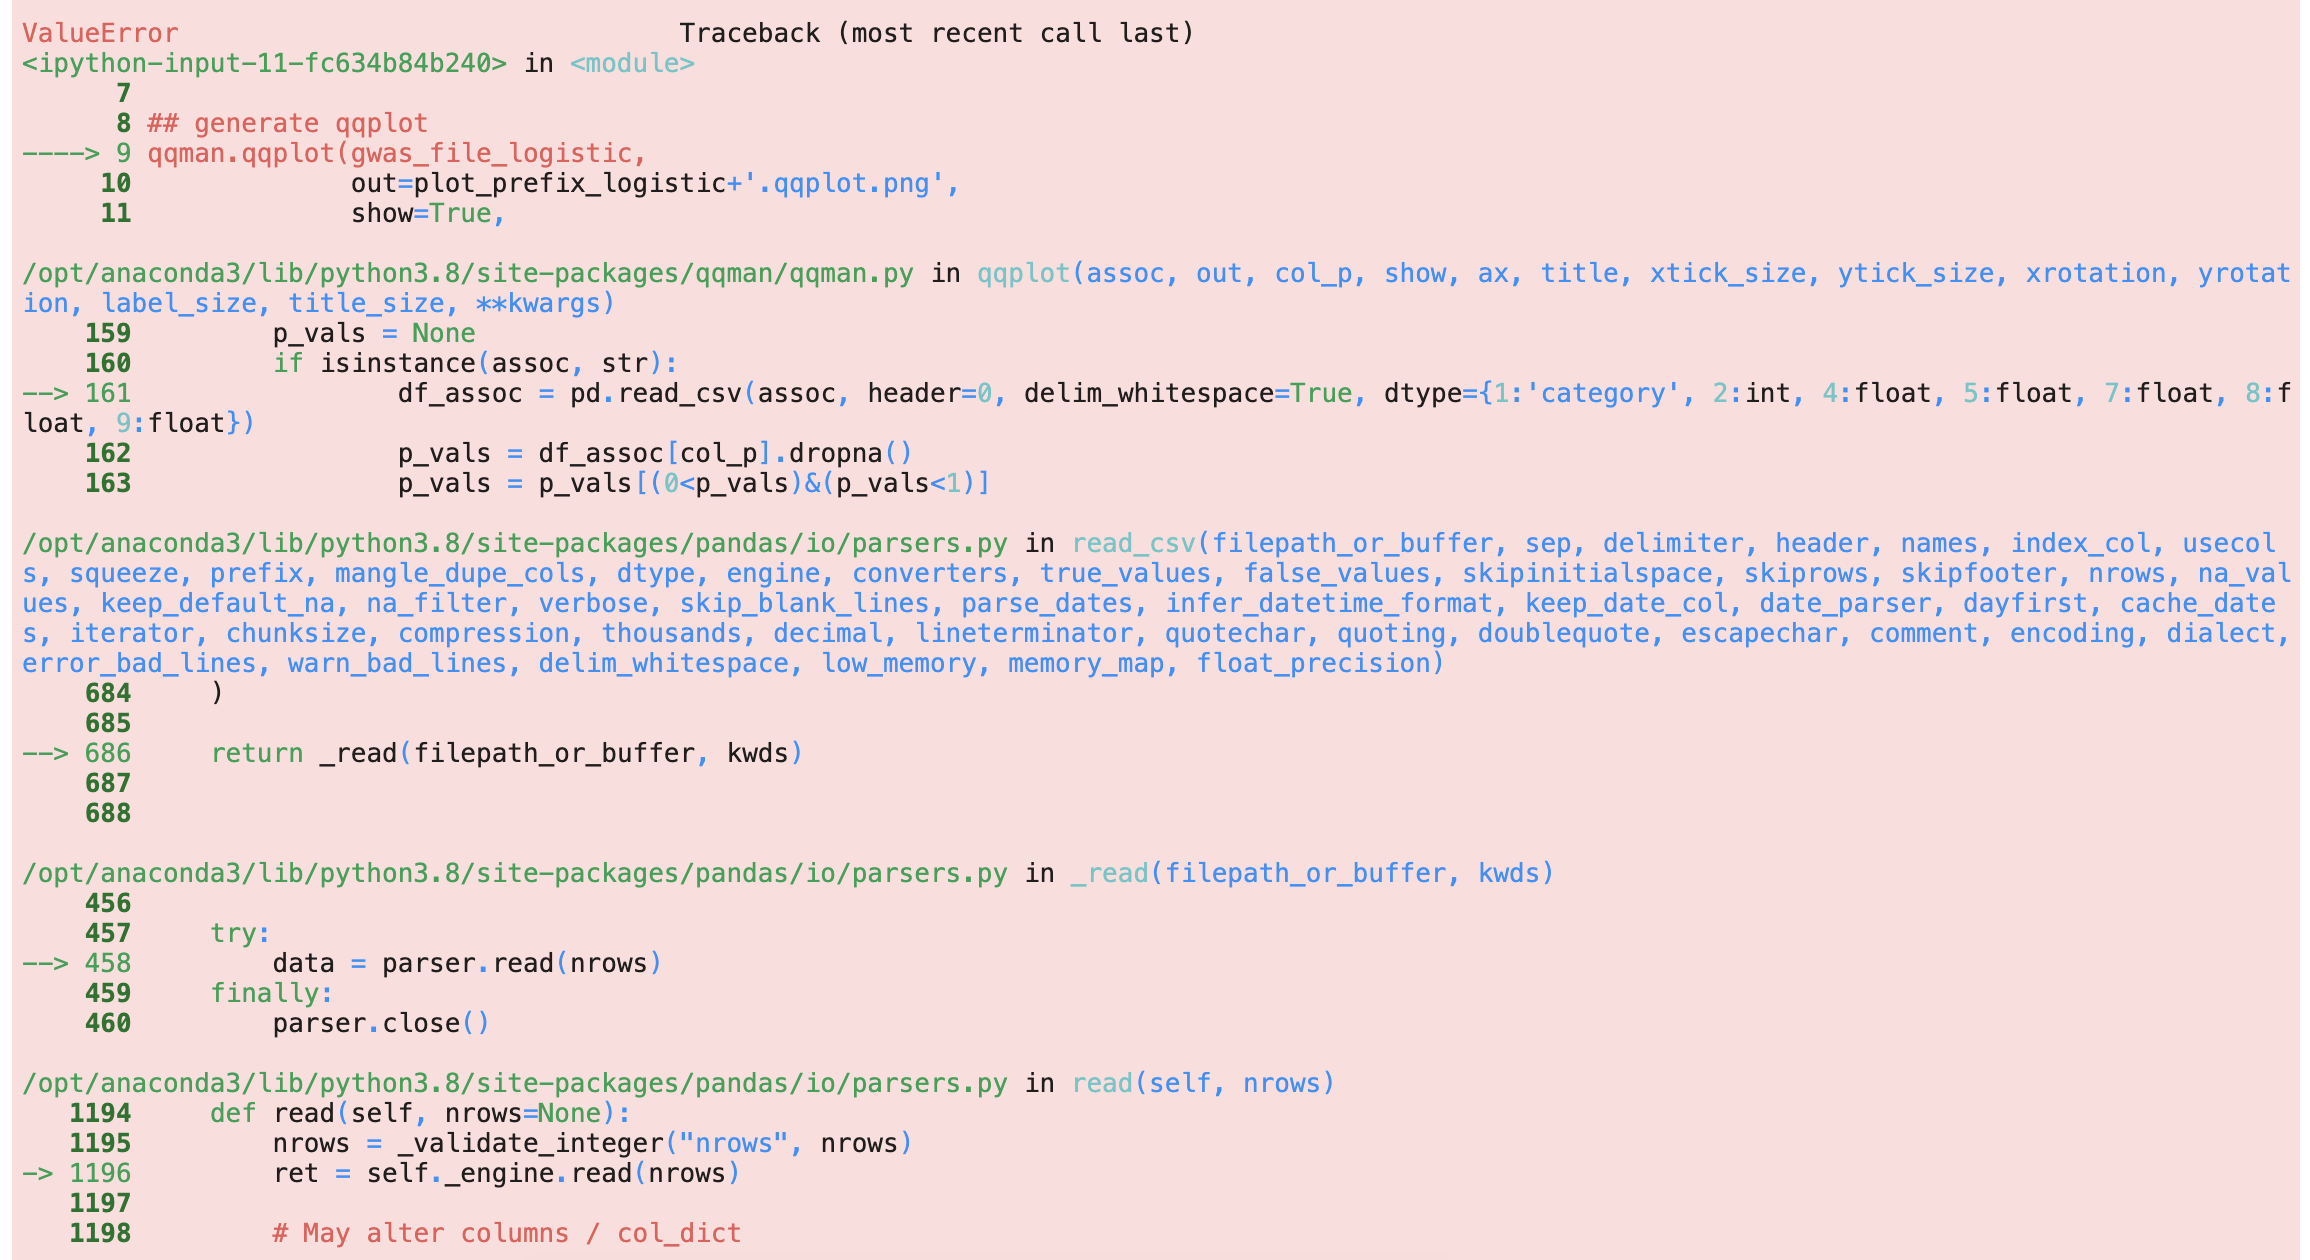  
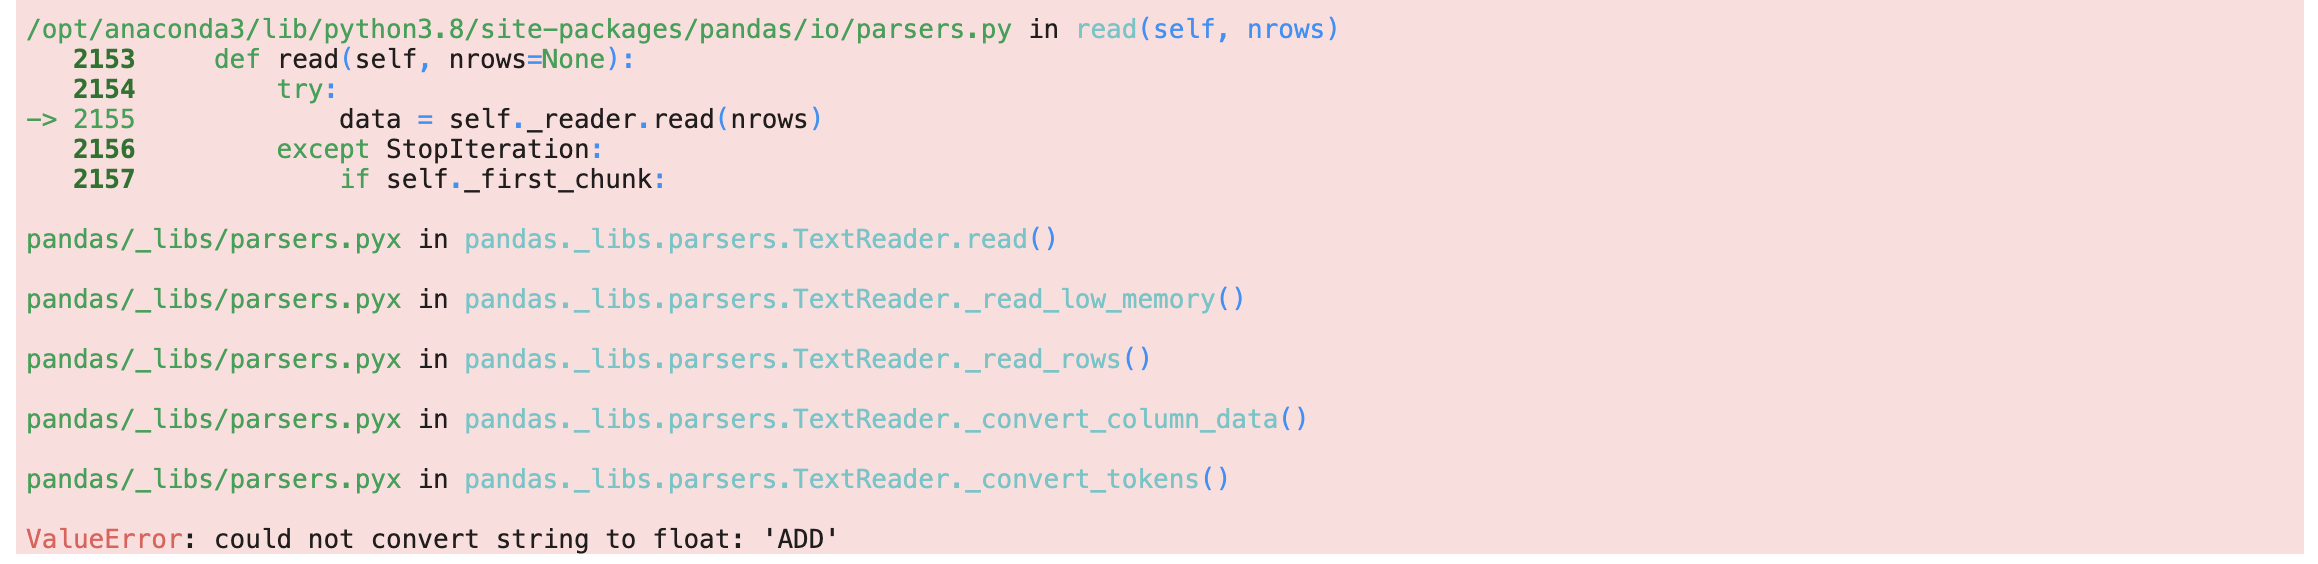

#### read in .assoc.logistic file --> Pandas DF & extract 'P' value column to list & delete DF

In [9]:
df = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df.head()

pval_logistic = list(df['P'])
del df

CHR          SNP      BP A1 TEST  NMISS      OR      SE  STAT         P
0    1   rs75333668  762320  T  ADD      0 -0.0495  0.1728   0.0  0.972100
1    1  rs200686669  861349  T  ADD      0 -0.0299  0.1837   0.0  0.765799
2    1  rs201186828  865545  A  ADD      0  0.1469  0.3851   0.0  0.702999
3    1   rs41285790  865628  A  ADD      0  0.0099  0.0530   0.0  0.817000
4    1  rs140751899  865662  A  ADD      0 -0.0434  0.1606   0.0  0.583500

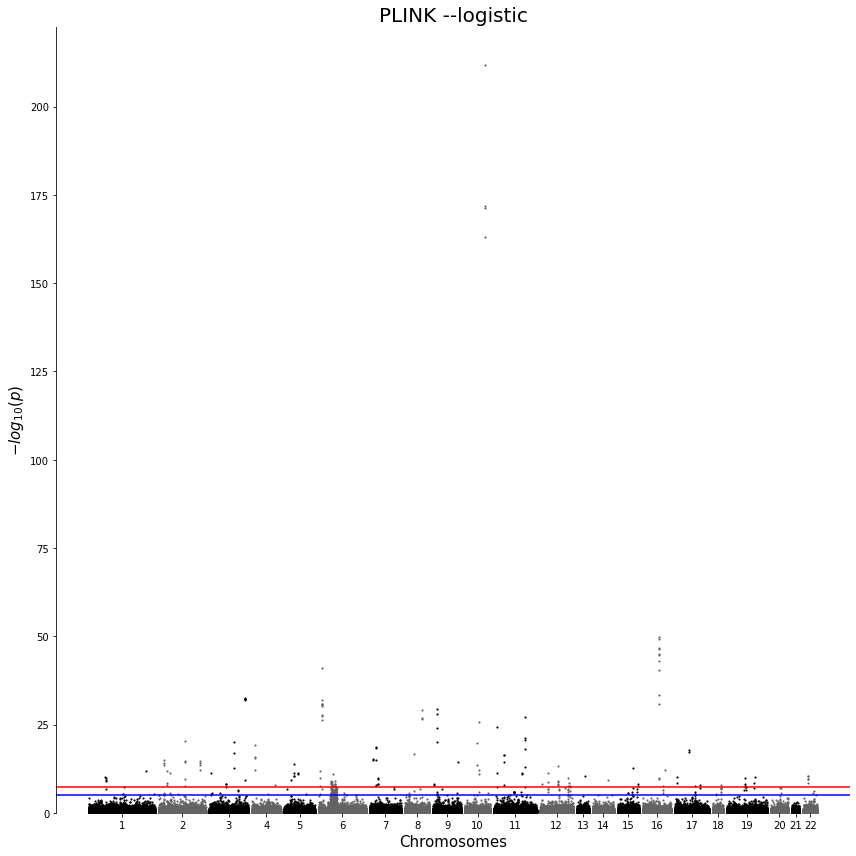

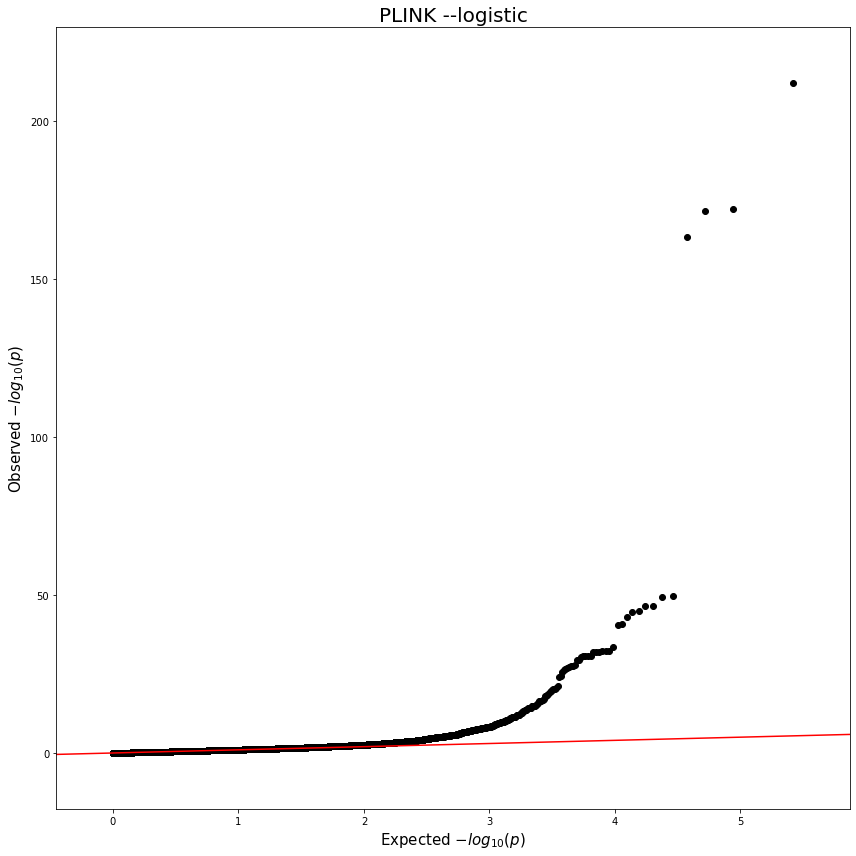

In [10]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=True, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=True, 
                title='PLINK --logistic')


#### Generate --logistic plots as subplot example

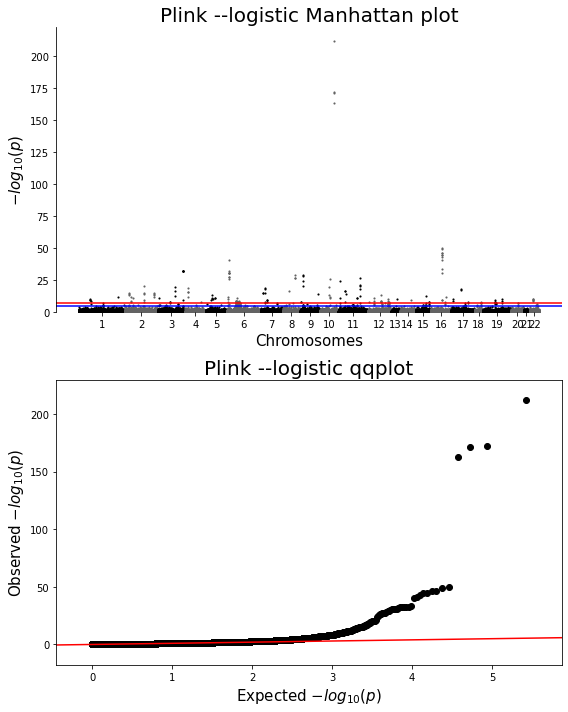

In [11]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, ax=axes[0], title="Plink --logistic Manhattan plot")
qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()

#### Write output plot files  

> set `show=False`

In [12]:
## generate Manhattan plot
qqman.manhattan(gwas_file_logistic, 
                out=plot_prefix_logistic+'.Manhattan.png', 
                show=False, 
                title='PLINK --logistic', 
                gap=50)

## generate qqplot
qqman.qqplot(pval_logistic, 
                out=plot_prefix_logistic+'.qqplot.png', 
                show=False, 
                title='PLINK --logistic')

<br>  

## Example of how to format Manhattan plot

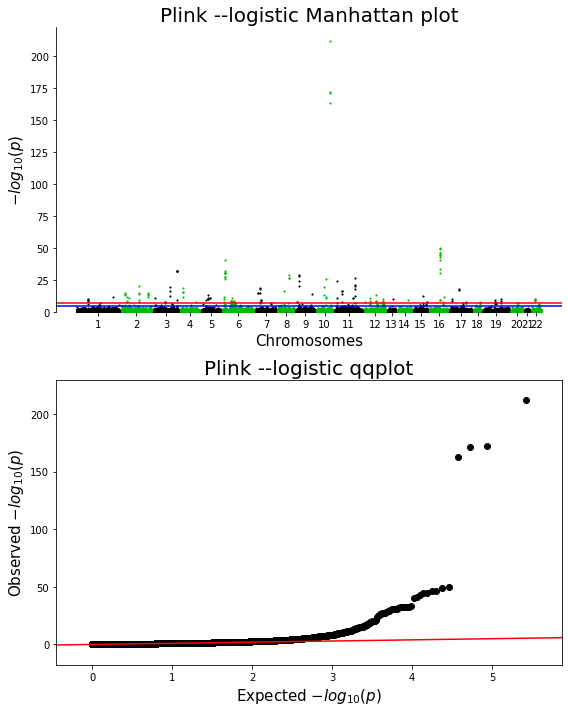

In [13]:
## generate plot figure
figure, axes = plt.subplots(nrows=2, ncols=1, figsize = (8,10))

qqman.manhattan(gwas_file_logistic, 
                ax=axes[0], 
                title="Plink --logistic Manhattan plot", 
                cmap=plt.get_cmap("nipy_spectral"), cmap_var=2, gap=50)

qqman.qqplot(pval_logistic, ax=axes[1], title="Plink --logistic qqplot")

figure.tight_layout()